In [1]:
# we need to compile the fortran code into something python can use
!make

f2py -c -m lib_watermass lib_watermass.f90
running build
running config_cc
unifing config_cc, config, build_clib, build_ext, build commands --compiler options
running config_fc
unifing config_fc, config, build_clib, build_ext, build commands --fcompiler options
running build_src
build_src
building extension "lib_watermass" sources
f2py options: []
f2py:> /var/folders/j4/v7kprvpx0j3cnnsmbwxbbr300000gn/T/tmpmdxhi65f/src.macosx-10.7-x86_64-3.6/lib_watermassmodule.c
creating /var/folders/j4/v7kprvpx0j3cnnsmbwxbbr300000gn/T/tmpmdxhi65f/src.macosx-10.7-x86_64-3.6
Reading fortran codes...
	Reading file 'lib_watermass.f90' (format:free)
Post-processing...
	Block: lib_watermass
			Block: volume_watermass_from_ts
Post-processing (stage 2)...
Building modules...
	Building module "lib_watermass"...
		Creating wrapper for Fortran subroutine "volume_watermass_from_ts"("volume_watermass_from_ts")...
		Constructing wrapper function "volume_watermass_from_ts"...
		  volume = volume_watermass_from_ts(dx

Removing build directory /var/folders/j4/v7kprvpx0j3cnnsmbwxbbr300000gn/T/tmpmdxhi65f
f2py -c -m creeping_sea creeping_sea.f90
running build
running config_cc
unifing config_cc, config, build_clib, build_ext, build commands --compiler options
running config_fc
unifing config_fc, config, build_clib, build_ext, build commands --fcompiler options
running build_src
build_src
building extension "creeping_sea" sources
f2py options: []
f2py:> /var/folders/j4/v7kprvpx0j3cnnsmbwxbbr300000gn/T/tmpf0gmv86x/src.macosx-10.7-x86_64-3.6/creeping_seamodule.c
creating /var/folders/j4/v7kprvpx0j3cnnsmbwxbbr300000gn/T/tmpf0gmv86x/src.macosx-10.7-x86_64-3.6
Reading fortran codes...
	Reading file 'creeping_sea.f90' (format:free)
Post-processing...
	Block: creeping_sea
			Block: cslf
Post-processing (stage 2)...
Building modules...
	Building module "creeping_sea"...
		Constructing wrapper function "cslf"...
		  varout = cslf(varin,spval,validmin,validmax,[nx,ny])
	Wrote C/API module "creeping_sea" to file "

Removing build directory /var/folders/j4/v7kprvpx0j3cnnsmbwxbbr300000gn/T/tmpf0gmv86x


In [8]:
import xarray as xr
import creeping_sea
import numpy as np
%matplotlib inline
from matplotlib import cm

In [3]:
#---------------------------------------------------------------
# sample data set (use make getdata to download WOA annual data)
fnameT = 'woa13_5564_t00_01.nc'

woa = xr.open_dataset(fnameT,decode_times=False)

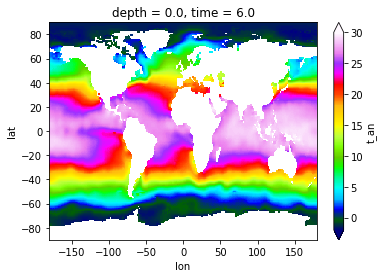

In [9]:
woa.t_an[0,0,:,:].plot(vmin=-2,vmax=30,cmap=cm.gist_ncar)


In [17]:
tsurf = woa.t_an[0,0,:,:].values
tsurf[np.isnan(tsurf)] = 9999.
tsurf

array([[  9.99900000e+03,   9.99900000e+03,   9.99900000e+03, ...,
          9.99900000e+03,   9.99900000e+03,   9.99900000e+03],
       [  9.99900000e+03,   9.99900000e+03,   9.99900000e+03, ...,
          9.99900000e+03,   9.99900000e+03,   9.99900000e+03],
       [  9.99900000e+03,   9.99900000e+03,   9.99900000e+03, ...,
          9.99900000e+03,   9.99900000e+03,   9.99900000e+03],
       ..., 
       [ -1.46401000e+00,  -1.46610999e+00,  -1.46831000e+00, ...,
         -1.46471000e+00,  -1.46371007e+00,  -1.46131003e+00],
       [ -1.42140996e+00,  -1.42271006e+00,  -1.42500997e+00, ...,
         -1.42230999e+00,  -1.42300999e+00,  -1.42201006e+00],
       [ -1.41821003e+00,  -1.41821003e+00,  -1.41821003e+00, ...,
         -1.41821003e+00,  -1.41821003e+00,  -1.41821003e+00]], dtype=float32)

In [24]:
tsurf_extrp = creeping_sea.cslf(tsurf,9999,-10,40)

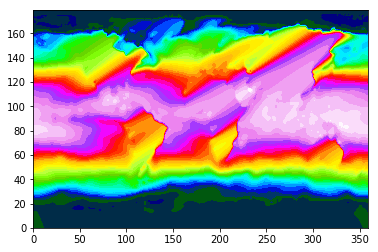

In [25]:
import matplotlib.pylab as plt
plt.figure()
plt.contourf(tsurf_extrp,50,vmin=-2,vmax=30,cmap=cm.gist_ncar)
plt.show()